## Table of Content

1. Hypothesis Generation

2. Data Exploration

3. Data Cleaning

4. Feature Engineering

5. Model Building

6. Hyper Parameter Tuning

### Hypothesis Generation

#### a. Store Level:

 - City: It plays an important role in the sales as metropolitan cities will have better sales.
 
 - Location: Stores in marketplaces will have higher sales.
 
 - Population: Stores in densely populated areas will have higher sales.
 
 - Competitor: Stores which have similar other stores will have less sales.
 
 - Ambiance: Well maintaned Stores will have higher sales.
 
 
 #### b. Customer Level: 
 
 - Customer Income: Customers having higher income will have will likely buy more products.
 
 - Family size: Larger family will directly impact the sales.
 
 - Customer Behaviour: If the stores meet all the needs of the customers then the sales willbe higher.
 
 - Job Profile: Customers having executive level jobs are likely to spend more.
 
 
 #### c. Product Level:
 
 - Utility: If the product is meeting the utility needs of the customer then it will impact the sales.
 
 - Display Area: If the product is given a larger display area in store then it is likely to be sold.
 
 - Advertising: If the Advertising of the product is done correctly then it will catch the attention of the customers ans thus likely to be sold.
 
 - Visibility in Store: The more visible the product is in store likely it is to be sold.
 
 - Brand: Brandedproduct have higher sales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_original=pd.read_csv('train.csv')
test_original=pd.read_csv('test.csv')

In [3]:
train=train_original.copy()
test=test_original.copy()

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [6]:
train.shape,test.shape,data.shape

((8523, 13), (5681, 12), (14204, 13))

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Data Exploration

In [8]:
## Missing value interpretation in %
(data.isnull().sum()/(data.shape[0]))*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. Item_Visibility has 0.00 as min value which does not make sense as when the productn is placed in the store it has to be visible.



2. Outlet_Establishment_Year is mainly from 1985-2009. We can futher convert this into date format and calculate how old the store is.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [11]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

We can see that Item_Type has 16 unique variables.

We will further explore the categorical variables and remove th ID's and the source column.

In [12]:
cat=[]
for x in data.dtypes.index:
    if(data.dtypes[x]=='object' and x!='source' and x!='Item_Identifier' and x!='Outlet_Identifier'):
        cat.append(x)

In [13]:
for col in cat:
    
    print(data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


1. We can see that Item_Fat_Content has a few miss-spelled names.

2. We can try and see if we are getting better results by combining the Supermarket Type3 & Supermarket Type2 from the Outlet_Type column .

### Data Cleaning

##### This generally involves treating the missing values and outliers. This step is important in case of Regression algorithms . Advanced tree algorithms are not affected by these.

In [14]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


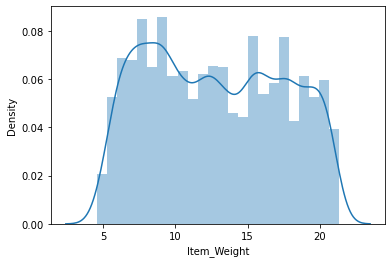

In [15]:
sns.distplot(data['Item_Weight'])

We will now replace the missing values in the Item_Weight column wrt to Item_Identifier

In [16]:
item_df=pd.pivot_table(data,'Item_Weight',index='Item_Identifier')
item_df

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [17]:
missing=data['Item_Weight'].isnull()
data.loc[missing,'Item_Weight']=data.loc[missing,'Item_Identifier'].apply(lambda x: item_df.loc[x,'Item_Weight'] )

In [18]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [19]:
from scipy.stats import mode

outlet_df=data.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=lambda x:mode(x).mode[0])
outlet_df

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [20]:
missing=data['Outlet_Size'].isnull()

In [21]:
data.loc[missing,'Outlet_Size'] = data.loc[missing,'Outlet_Type'].apply(lambda x: outlet_df.at[x,'Outlet_Size'])

In [22]:
(data.isnull().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

##### This conforms that there are no missing values in the combined dataset..

### Feature Engineering

In this section we will implement all the ideas we explored in Feature Exploration.

In [23]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


##### As we can see that there is a significant diffrence in the Sales according to the outlet_type  so we will leave it.

###### We had earlier seen that Item_Visibility had 0.00 as their min value which is not possible as an item when placed in the store will have some visisbility.


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


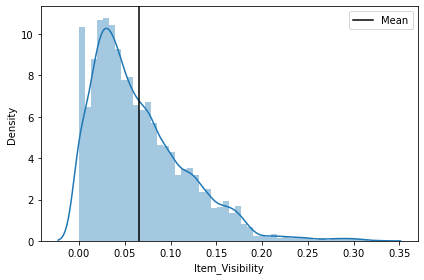

In [24]:
sns.distplot(data['Item_Visibility'])
plt.axvline(data['Item_Visibility'].mean(),c='k',label='Mean')

plt.legend()
plt.tight_layout()

In [25]:
visibility_df=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_df

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [26]:
missing=(data['Item_Visibility']==0)

data.loc[missing,'Item_Visibility']=data.loc[missing,'Item_Identifier'].apply(lambda x: visibility_df.loc[x,'Item_Visibility'])

In [27]:
sum(data['Item_Visibility']==0)

0

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


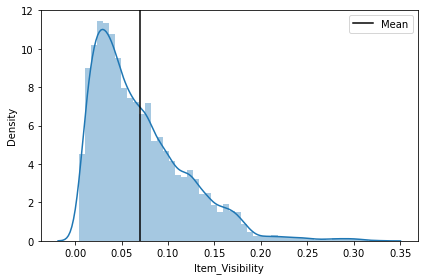

In [28]:
sns.distplot(data['Item_Visibility'])
plt.axvline(data['Item_Visibility'].mean(),c='k',label='Mean')

plt.legend()
plt.tight_layout()

In [29]:
## Create a new feature here

##### We had earlier seen that Item_Identifier had 16 unique categories. We will group then as Food, Drinks and Non-Consumable depending on the first two letters of the Item_Identifier

In [30]:
data['Item_Identifier'].apply(lambda x:x[:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [31]:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[:2])

In [32]:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [33]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Further combining the categories of Item_Identifier according to the Target variable and combining those who have higher values.

In [34]:
item_identifier_part_2=data.pivot_table(values='Item_Outlet_Sales',index='Item_Type_Combined')
item_identifier_part_2

,Item_Outlet_Sales
Item_Type_Combined,
Drinks,1997.333337
Food,2215.354223
Non-Consumable,2142.721364


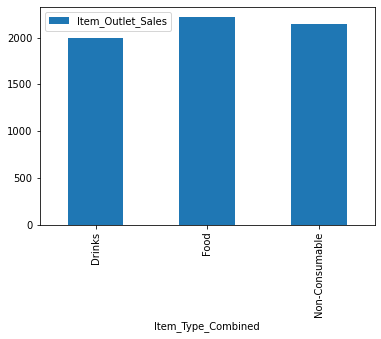

In [74]:
item_identifier_part_2.plot(kind='bar')
plt.savefig('Items_combined.png')

#### Combine these categories based on sales.

In [36]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [37]:
data['Item_Type_Combined']=data['Item_Type_Combined'].replace({'Food':'Consumable','Drinks':'Consumable'})

In [38]:
data['Item_Type_Combined'].value_counts()

Consumable        11518
Non-Consumable     2686
Name: Item_Type_Combined, dtype: int64

##### Finding the age of the store

In [39]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_Combined'],
      dtype='object')

In [40]:
data['Store_Old']=2013-data['Outlet_Establishment_Year']

In [41]:
data['Store_Old'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Store_Old, dtype: float64

This shows that the stores are basically 4-28 years old

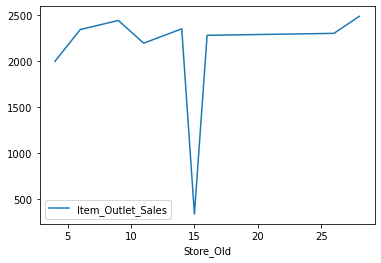

In [75]:
data.pivot_table(values='Item_Outlet_Sales',index='Store_Old').plot()
plt.savefig('Oulter_Old.png')

1. We can see that stores which are older than 25 years have the highest sales.

2. New Stores have lowest sales.

#### We had earlier in the data exploration seen that Item_Fat_Content has many typo mistakes. We will correct them.

In [43]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [44]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [45]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

##### We can see that some Non-Consumable items are also considered as Low_fat. So we will declare them as 'Non-edible'.

In [46]:
data[data['Item_Fat_Content']=='Low Fat']['Item_Type_Combined'].head()

0         Consumable
2         Consumable
4     Non-Consumable
7         Consumable
10        Consumable
Name: Item_Type_Combined, dtype: object

In [47]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [48]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obj

### Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [51]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [52]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Store_Old,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


In [53]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Store_Old                      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

### Converting the data back to train & test

It is generally a good idea to save the modified data fie as it can later be used for other purposes.

In [54]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [55]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

### Model Building

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold,cross_val_score

In [76]:
def model_fit(model,train,test,columns_needed,target,IDcols,filename):
    
    model.fit(train[columns_needed],train[target]) # Train the model
    
    train_predictions = model.predict(train[columns_needed]) # Make prediction on the data
    
    ## Cal Cross validation score
    cv_score=-cross_val_score(model,train[columns_needed],train[target],cv=5,scoring='neg_mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    
    print('CV_mean is : {}'.format(np.round(np.mean(cv_score),0)))
    print('CV_std is : {}'.format(np.round(np.mean(cv_score),0)))
    
    ## Calculate the RMSE score
    print('RMSE score on train data : {}'.format(np.round(np.sqrt(mean_squared_error(train[target],train_predictions)),0)))
    
    ## Prediction on test data
    test_predictions = model.predict(test[columns_needed])
    

    ## Adding the test predictions to the submission file
    submission=pd.DataFrame({x:test[x] for x in IDcols})
    submission[target]= np.abs(test_predictions)
    
    submission.to_csv(filename, index=False)
    
    
    

In [77]:
target='Item_Outlet_Sales'
IDcols=['Item_Identifier','Outlet_Identifier']
columns_needed=[i for i in train.columns if i not in [target]+IDcols]

#### Linear Regression

In [78]:
lr=LinearRegression(normalize=True)

model_fit(lr,train,test,columns_needed,target,IDcols,'Linear_Regression.csv')

CV_mean is : 1130.0
CV_std is : 1130.0
RMSE score on train data : 1127.0


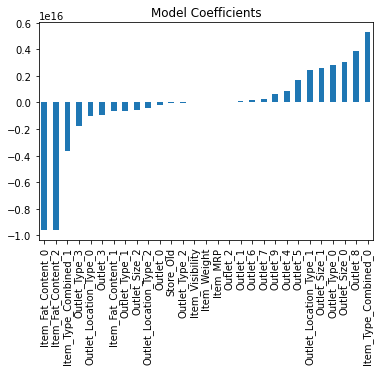

<Figure size 432x288 with 0 Axes>

In [79]:
coef1 = pd.Series(lr.coef_, columns_needed).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

plt.show()


plt.savefig('Linear Regression Coeff.png')

##### We can see that the model coeff values are very high that might be due to Overfitting so we will try other Regularization methods to avoid overfiting.

#### Lasso

In [80]:
lasso=Lasso(alpha=1.0,random_state=5,normalize=True)

model_fit(lasso,train,test,columns_needed,target,IDcols,'Lasso.csv')


CV_mean is : 1141.0
CV_std is : 1141.0
RMSE score on train data : 1144.0


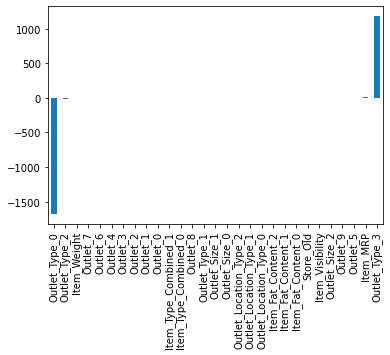

In [81]:
# plt.plot(,columns_needed,kind='bar')
coef=pd.Series(lasso.coef_,columns_needed).sort_values()
coef.plot(kind='bar',label='Model Coeff')

plt.savefig('Lasso Coeff.png')

##### We can see that as we increase the 'alpha' the number of selected features keep on decreasing.

#### ElasticNet

In [82]:
en=ElasticNet(alpha=2.0,
    l1_ratio=0.5,
    random_state=5,
    normalize=True)

In [83]:
model_fit(en,train,test,columns_needed,target,IDcols,'Elasic_Net.csv')

CV_mean is : 1706.0
CV_std is : 1706.0
RMSE score on train data : 1706.0


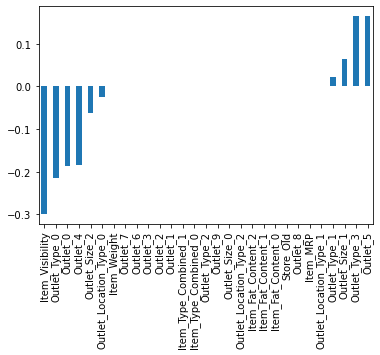

<Figure size 432x288 with 0 Axes>

In [84]:
coef=pd.Series(en.coef_,columns_needed).sort_values()
coef.plot(kind='bar',label='Model Coeff')
plt.show()

plt.savefig('Elastic Net Coeff.png')


#### Decision tree 

In [85]:
dtree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_fit(dtree,train,test,columns_needed,target,IDcols,'Decisiontree.csv')

CV_mean is : 1095.0
CV_std is : 1095.0
RMSE score on train data : 1060.0


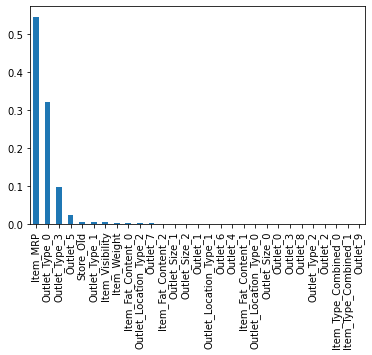

<Figure size 432x288 with 0 Axes>

In [86]:
coef=pd.Series(dtree.feature_importances_,columns_needed).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance ')

plt.show()

plt.savefig('Desicion Tree.png')

##### Lets try taking only the important features.

In [87]:
dtree_features=['Item_MRP','Outlet_Type_0','Outlet_3','Store_Old']

dtree=DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
model_fit(dtree,train,test,columns_needed,target,IDcols,'Decisiontree.csv')

CV_mean is : 1100.0
CV_std is : 1100.0
RMSE score on train data : 1069.0


#### Random Forest

In [88]:
random_tree=RandomForestRegressor(n_estimators=200,
    max_depth=15,
    min_samples_split=100)

model_fit(random_tree,train,test,columns_needed,target,IDcols,'Randomtree.csv')

CV_mean is : 1085.0
CV_std is : 1085.0
RMSE score on train data : 1005.0


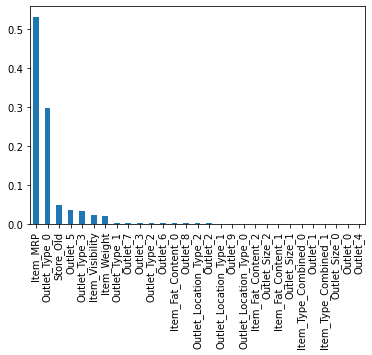

<Figure size 432x288 with 0 Axes>

In [89]:
coef=pd.Series(random_tree.feature_importances_,columns_needed).sort_values(ascending=False)
coef.plot(kind='bar', label='Feature Importance')

plt.show()

plt.savefig('Random Forest.png')

##### Lets try with using only the important features.

In [90]:
random_tree_features=['Item_MRP','Outlet_Type_0','Outlet_3','Store_Old','Item_Weight','Item_Visibility','Outlet_5']


random_tree=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)

model_fit(random_tree,train,test,random_tree_features,target,IDcols,'Randomtree.csv')

CV_mean is : 1089.0
CV_std is : 1089.0
RMSE score on train data : 1069.0


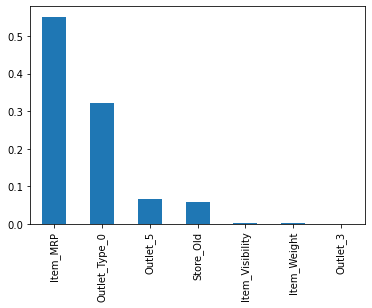

<Figure size 432x288 with 0 Axes>

In [91]:
coef=pd.Series(random_tree.feature_importances_,random_tree_features).sort_values(ascending=False)
coef.plot(kind='bar',label='RandomForest Feature Importance')

plt.show()

plt.savefig('Using Selected features from Random Forest.png')

### Hyper Parameter Tuning

In this we will be using Random Forest with Grid search CV

In [219]:
from sklearn.model_selection import GridSearchCV

n_estimators=[100,200,300,400,500]
max_depth=[int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split=[2,4,6,8,10,12,14,16,20]
# max_features=['auto','sqrt','log2']


parameters={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split}



In [220]:
random_tree=RandomForestRegressor()

grid = GridSearchCV(estimator = random_tree, param_grid = parameters, cv = 5)

grid.fit(train[columns_needed],train[target])

KeyboardInterrupt: 

## Refrences

https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

https://courses.analyticsvidhya.com/courses/take/big-mart-sales-prediction-using-r/texts/6120118-missing-value-treatment